In [11]:
import sys
import os
import yaml
import matplotlib.pyplot as plt
import numpy as np
module_path = os.path.abspath(os.path.join('../..'))
if module_path + "/src/simulations_v2" not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")
    
from load_params import load_params
from analysis_helpers import get_cumulative_infection_cols

from multi_group_simulation import MultiGroupSimulation
from vax_sim_utils import load_vax_group_configs, create_multigrp_vax_sim

In [2]:
UG_vax_config = load_vax_group_configs(os.getcwd() + "/vax_sim_nominal_params/ug_greek_athlete_vax_config.yaml")

/home/aaj54/group-testing/src/simulations_v2/vax_sim_utils.py:28: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  vax_config = yaml.load(f)
/home/aaj54/group-testing/src/simulations_v2/load_params.py:136: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  params = yaml.load(f)
/home/aaj54/group-testing/src/simulations_v2/load_params.py:45: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  age_sev_params = yaml.load(f)


In [7]:
sim = create_multigrp_vax_sim(UG_vax_config[0], UG_vax_config[1], UG_vax_config[2], 0.9, 0.3)
# 0.9 transmission mult for vax, 0.3 susceptibility mult for vax

In [8]:
cum_inf_cols = get_cumulative_infection_cols(sim.run_new_trajectory(T=1)[1])

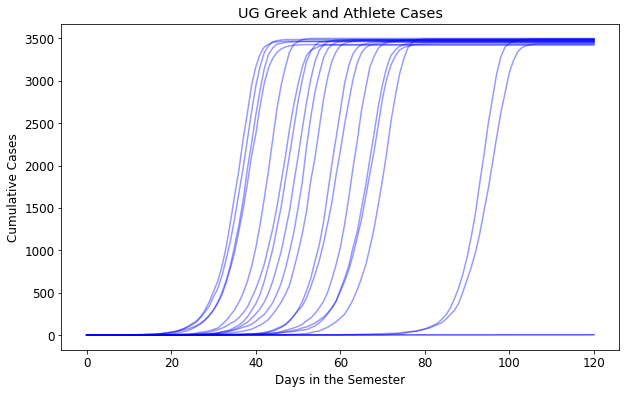

In [5]:
# Plotting trajectories
n_trajs = 20
plt.figure(figsize=(10,6))
for _ in range(n_trajs):
    plt.plot(sim.run_new_trajectory(T=120)[1][cum_inf_cols].sum(axis=1), alpha=0.4, color='blue')

plt.xlabel('Days in the Semester')
plt.ylabel('Cumulative Cases')
plt.title('UG Greek and Athlete Cases')
plt.show()

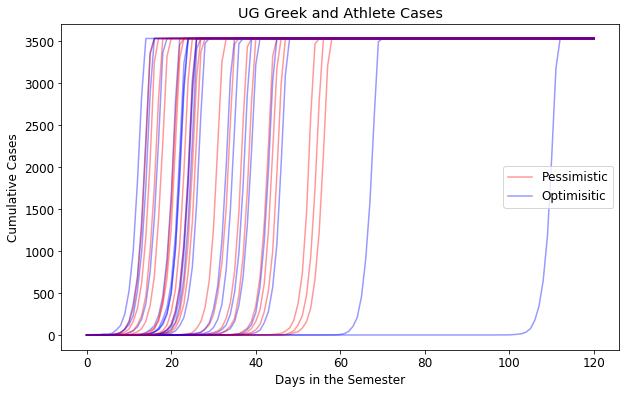

In [9]:
UG_vax_config_matrix = 2 * UG_vax_config[2]
UG_vax_config[0][0]['expected_contacts_per_day'] *= 2
UG_vax_config[0][1]['expected_contacts_per_day'] *= 2

sim_pess = create_multigrp_vax_sim(UG_vax_config[0], UG_vax_config[1], UG_vax_config_matrix, 1, 0.3)
sim_opt = create_multigrp_vax_sim(UG_vax_config[0], UG_vax_config[1], UG_vax_config_matrix, 0.5, 0.3)

cum_inf_cols = get_cumulative_infection_cols(sim_pess.run_new_trajectory(T=1)[1])

# Plotting trajectories
n_trajs = 20
plt.figure(figsize=(10,6))
label = True
for _ in range(n_trajs):
    if label:
        plt.plot(sim_pess.run_new_trajectory(T=120)[1][cum_inf_cols].sum(axis=1), alpha=0.4, color='red', label='Pessimistic')
        plt.plot(sim_pess.run_new_trajectory(T=120)[1][cum_inf_cols].sum(axis=1), alpha=0.4, color='blue', label='Optimisitic')
        label = False
    else:
        plt.plot(sim_pess.run_new_trajectory(T=120)[1][cum_inf_cols].sum(axis=1), alpha=0.4, color='red')
        plt.plot(sim_pess.run_new_trajectory(T=120)[1][cum_inf_cols].sum(axis=1), alpha=0.4, color='blue')

plt.xlabel('Days in the Semester')
plt.ylabel('Cumulative Cases')
plt.title('UG Greek and Athlete Cases')
plt.legend()
plt.show()

In [16]:
# Contour Plot
trans_mult_vac = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
contact_rate_mult = [1, 1.2, 1.4, 1.6, 1.8, 2]

n_trajs = 20

Zs_inf = []

for trans_mult in trans_mult_vac:
    Z_inf = []
    for contact_rate in contact_rate_mult:
        UG_vax_config_matrix = 2 * UG_vax_config[2]
        UG_vax_config[0][0]['expected_contacts_per_day'] *= 2
        UG_vax_config[0][1]['expected_contacts_per_day'] *= 2
        
        sim = create_multigrp_vax_sim(UG_vax_config[0], UG_vax_config[1], UG_vax_config_matrix, trans_mult, 0.3)
        cum_inf_cols = get_cumulative_infection_cols(sim_pess.run_new_trajectory(T=1)[1])
        
        infs = list()
        for _ in range(n_trajs):
            infs.append(np.array(sim.run_new_trajectory(T=120)[1][cum_inf_cols].sum(axis=1))[-1])
        Z_inf.append(np.mean(infs))
    Zs_inf.append(Z_inf)


ValueError: lam value too large

TypeError: Length of y must be number of rows in z.

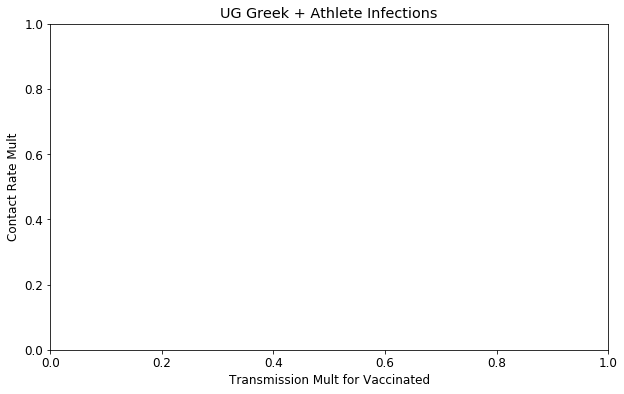

In [15]:
plt.figure(figsize=(10,6))
plt.title("UG Greek + Athlete Infections")
plt.ylabel("Contact Rate Mult")
plt.xlabel("Transmission Mult for Vaccinated")
# X,Y = np.meshgrid(trans_mult_vac, contact_rate_mult)
# CS = plt.contour(X, Y, np.array(Zs_inf).T)
CS = plt.contour(np.array(trans_mult_vac), np.array(contact_rate_mult), np.array(Zs_inf).T)

In [ ]:

X_popsize = [2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]
Y_compliant = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]

Zs_hosp = []
Zs_inf = []
Zs_cornell_hosp = []
Zs_cornell_inf = []
Zs_UG_hosp = []
Zs_UG_inf = []

for popsize in X_popsize:
    
    Z_hosp = []
    Z_inf = []
    Z_cornell_hosp = []
    Z_cornell_inf = []
    Z_UG_hosp = []
    Z_UG_inf = []
    for perc_compliant in Y_compliant:
#for (contacts, popsize), dfs in sensitivity_output.sim_results['Nominal Student Parameters'].items():
        testing_policy = [0, 2/7,1/7,0,1/7, 2/7,1/7,1/30, 0]

        params_list = [ug_off_campus_unmonitored_params.copy(), ug_off_campus_compliant_params.copy(), gs_research_params.copy(), gs_other_unmonitored_params.copy(), gs_other_compliant_params.copy(), faculty_staff_student_params.copy(), faculty_staff_non_student_params.copy(), faculty_staff_off_campus_params.copy(), ithaca_community_params.copy()]

        group_names = ['UG unmonitored', 'UG compliant', 'GS research', 'GS compliant', 'GS monitored', 'F/S student', 'F/S non-student', 'F/S off', 'Ithaca']
        
        group_sizes = virtual_group_sizes.copy()
        group_sizes[0] = int(np.ceil(popsize * (1 - perc_compliant)))
        group_sizes[1] = int(np.floor(popsize * perc_compliant))
        
        params_list[0]['population_size'] = group_sizes[0]
        params_list[1]['population_size'] = group_sizes[1]

        # rescale interaction matrix based on population sizes
        interaction_matrix = rescale_virtual_interaction_matrix(perc_compliant, group_sizes)
        
        virtual_normal = list()
        
        print('Evaluating this: ', popsize, perc_compliant)
        tests_per_day, inf_matrix, hosp_matrix = evaluate_testing_policy(params_list, interaction_matrix, group_names, testing_policy, 112, 50)

        virtual_normal.append({'test_policy': testing_policy, 'tests_per_day': tests_per_day, 'inf_matrix': inf_matrix, 'hosp_matrix': hosp_matrix})        
        
        Z_hosp.append(np.quantile(np.sum(hosp_matrix, axis=1), 0.5))
        Z_inf.append(np.quantile(np.sum(inf_matrix, axis=1), 0.5))
        Z_cornell_hosp.append(np.quantile(np.sum(np.array(hosp_matrix)[:,:-1],axis=1), 0.5))
        Z_cornell_inf.append(np.quantile(np.sum(np.array(inf_matrix)[:,:-1],axis=1), 0.5))
        Z_UG_hosp.append(np.quantile(np.sum(np.array(hosp_matrix)[:,:2],axis=1), 0.5))
        Z_UG_inf.append(np.quantile(np.sum(np.array(inf_matrix)[:,:2],axis=1), 0.5))        

    Zs_hosp.append(Z_hosp)
    Zs_inf.append(Z_inf)
    Zs_cornell_hosp.append(Z_cornell_hosp)
    Zs_cornell_inf.append(Z_cornell_inf)
    Zs_UG_hosp.append(Z_UG_hosp)
    Zs_UG_inf.append(Z_UG_inf)

In [ ]:
# Double contacts from calibrated value
# 2 scenarios: 0.5 and 1x transmission mult
# Try contour plot (fall 2020 contact mult, transmission mult)